In [4]:
import pandas as pd

url="https://github.com/MicrosoftDocs/ml-basics/raw/master/challenges/data/flights.csv"
df_flights= pd.read_csv(url)
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


**1. CLEANING DATA**
* Identify any null or missing data, and impute appropriate replacement values.

In [5]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [ ]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

DepDel15 which mean departures are considered late if delay is 15 minute or more. above, there are some null at DepDel15. Let's check summary statistic for Dep

In [6]:
df_flights[df_flights.isnull().any(axis=1)].DepDelay.describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

As we can see the mean, min, max are null,  DepDel15 have none of the value were actually late departure. So, let's replace the missing valuen DepDel15 with a 0 and confirm there are no more missing values  

In [20]:
df_flights.DepDel15=df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

* **Identify and eliminate any outliers in the DepDelay and ArrDelay columns.**



DepDelay 
Minumum: -11.00
Mean: -0.92
Median: -2.00
Mode: -3.00
Maximum: 16.00
ArrDelay 
Minumum: -32.00
Mean: -5.03
Median: -6.00
Mode: 0.00
Maximum: 37.00


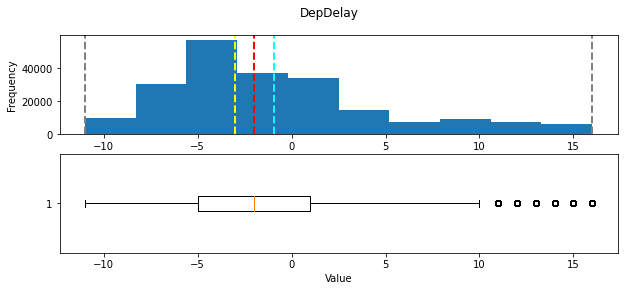

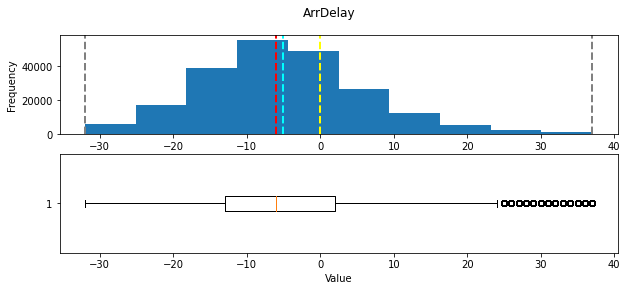

In [38]:
from matplotlib import pyplot as plt
def show_distr(var_data):
  min_val= var_data.min()
  max_val= var_data.max()
  mean_val= var_data.mean()
  med_val= var_data.median()
  mode_val= var_data.mode()[0]
  print(var_data.name, '\nMinumum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\nMaximum: {:.2f}'.format(min_val,mean_val,med_val,mode_val,max_val))

  # create a figure for 2 subplots( 2 rows, 1 column) 
  fig, ax= plt.subplots(2,1, figsize= (10,4))

  #plot the histogram
  ax[0].hist(var_data)
  ax[0].set_ylabel('Frequency')

  #add lines for the mean, median, and mode
  ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
  ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
  ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
  ax[0].axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)
  ax[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

  #plot the bloxplot
  ax[1].boxplot(var_data, vert=False)
  ax[1].set_xlabel('Value')

  fig.suptitle(var_data.name)
  fig.show
  
# Trim outliers for ArrDelay based on 1% and 90% percentiles
ArrDelay_01pcntile = df_flights.ArrDelay.quantile(0.01)
ArrDelay_90pcntile = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_90pcntile]
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_01pcntile]

# Trim outliers for DepDelay based on 1% and 90% percentiles
DepDelay_01pcntile = df_flights.DepDelay.quantile(0.01)
DepDelay_90pcntile = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay < DepDelay_90pcntile]
df_flights = df_flights[df_flights.DepDelay > DepDelay_01pcntile]

delay=['DepDelay','ArrDelay']
for col in delay:
  show_distr(df_flights[col]) 

**2. Explore the cleaned data**

* **View summary statistics for the numeric fields in the dataset.**






In [39]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


* What are the average (mean) departure and arrival delays?

In [40]:
df_flights[delay].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

* How do the carriers compare in terms of arrival delay performance?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


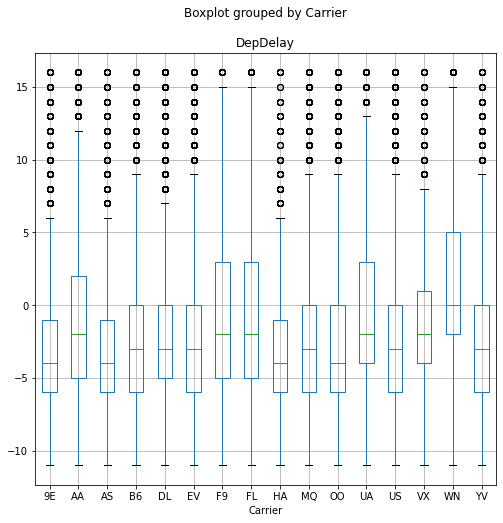

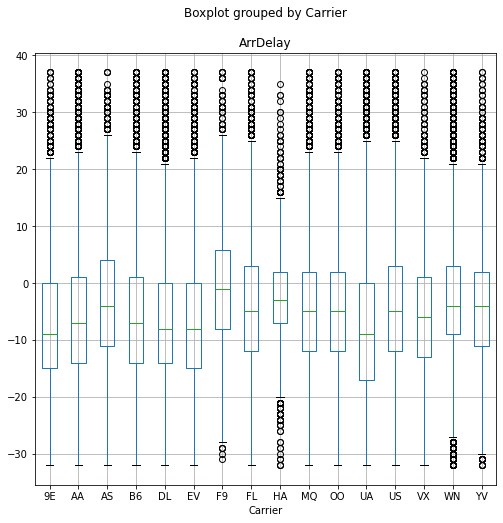

In [46]:
for col in delay:
  df_flights.boxplot(column=col, by='Carrier', figsize=(8,8))

* Is there a noticable difference in arrival delays for different days of the week?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


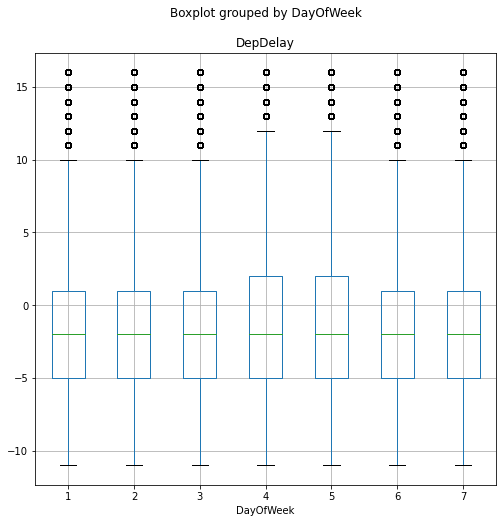

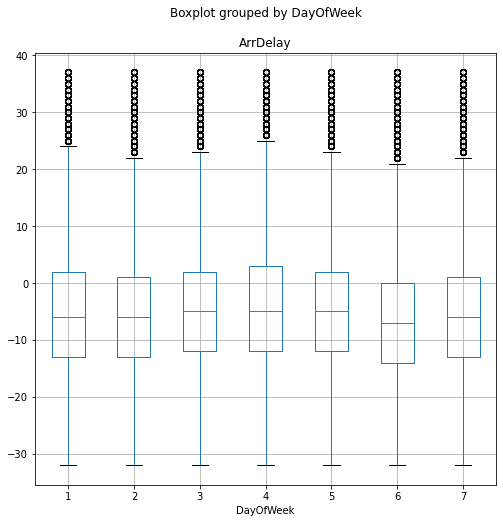

In [48]:
for col in delay:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

* Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,2.365960
Dallas Love Field,2.148798
William P Hobby,1.561927
Metropolitan Oakland International,0.964853
Denver International,0.807272
...,...
Memphis International,-2.962737
Tucson International,-2.989154
Ted Stevens Anchorage International,-3.149758


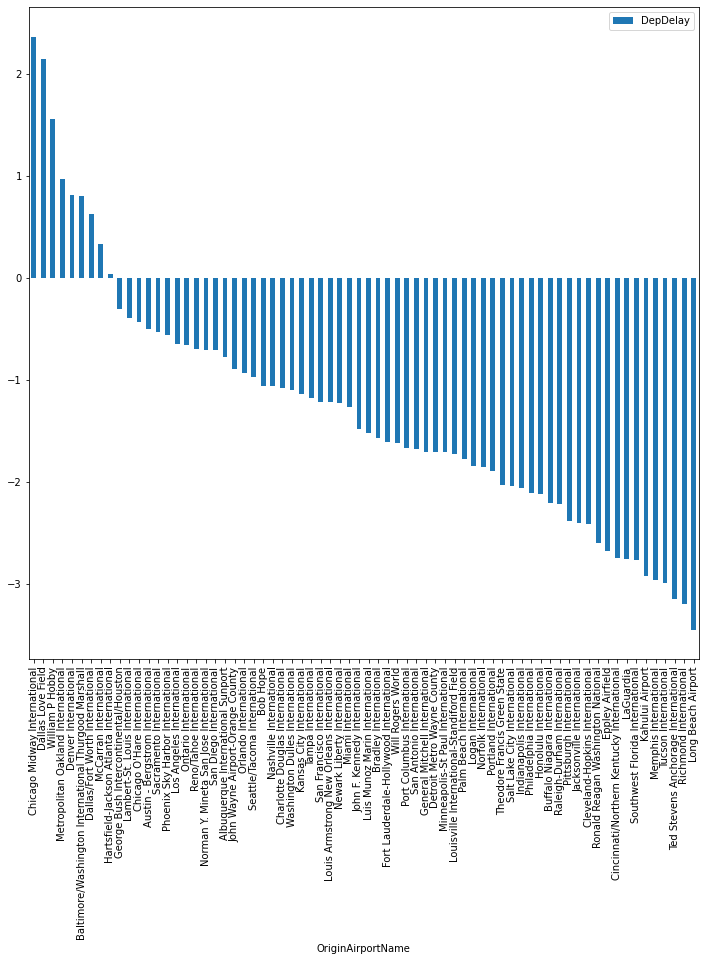

In [59]:
dep_airport_group= df_flights.groupby(df_flights.OriginAirportName)

mean_dep_delays= pd.DataFrame(dep_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_dep_delays.plot(kind="bar", figsize=(12,12))
mean_dep_delays

* Do late departures tend to result in longer arrival delays than on-time departures?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


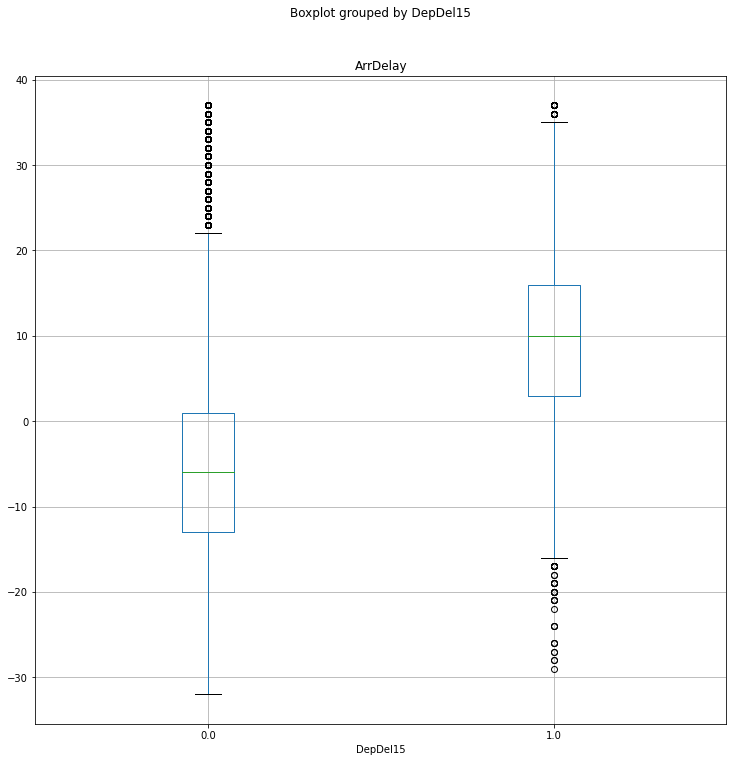

In [61]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(12,12))

* Which route (from origin airport to destination airport) has the most late arrivals?

In [62]:
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)
route_group = df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International > Los Angeles International,90
Los Angeles International > San Francisco International,69
LaGuardia > Hartsfield-Jackson Atlanta International,68
Los Angeles International > John F. Kennedy International,52
LaGuardia > Charlotte Douglas International,51
...,...
Logan International > Austin - Bergstrom International,0
Logan International > Memphis International,0
Logan International > Port Columbus International,0


* Which route has the highest average arrival delay?

In [63]:
pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)

,ArrDelay
Route,
Louis Armstrong New Orleans International > Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International > Palm Beach International,18.000000
John F. Kennedy International > Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International > Philadelphia International,12.800000
Memphis International > Denver International,9.758621
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
Denver International > Kahului Airport,-22.666667
